In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, roc_auc_score

from utils import exctract_data, DataFrameSelector

In [2]:
exctract_data()

[Errno 17] File exists: '/home/lee/churn/datasets'


In [3]:
train_data = 'datasets/bank_data_train.csv'
df = pd.read_csv(train_data)
df.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,146841,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
1,146842,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,0.186107,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,146843,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
3,146844,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
4,146845,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


In [4]:
df.describe()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,355190.000000,355190.000000,316867.000000,155163.0,60550.000000,155163.0,155163.0,355190.000000,77112.000000,77112.000000,...,355190.000000,95713.000000,93448.000000,98175.000000,95713.000000,355190.000000,93448.000000,93448.000000,93448.000000,355190.000000
mean,368794.674875,0.105225,0.044045,0.0,50.947498,0.0,0.0,0.001305,0.416896,0.414572,...,0.007309,0.055074,0.025707,0.049943,0.009252,0.004309,0.013938,0.013938,0.013938,0.081435
std,128148.804566,0.431372,0.108449,0.0,21.777855,0.0,0.0,0.029118,0.316493,0.338612,...,0.066681,0.215909,0.115732,0.185830,0.092789,0.059852,0.097099,0.097099,0.097099,0.273503
min,146841.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.006944,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257846.250000,0.000000,0.000000,0.0,33.000000,0.0,0.0,0.000000,0.166667,0.139645,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,368778.500000,0.000000,0.000000,0.0,54.000000,0.0,0.0,0.000000,0.300000,0.285714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,479737.750000,0.000000,0.036608,0.0,72.000000,0.0,0.0,0.000000,0.571429,0.661195,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,590828.000000,11.000000,1.000000,0.0,89.000000,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Columns: 116 entries, ID to TARGET
dtypes: float64(94), int64(9), object(13)
memory usage: 314.3+ MB


In [6]:
na_stat = df.isna().sum()
na_stat

ID                               0
CR_PROD_CNT_IL                   0
AMOUNT_RUB_CLO_PRC           38323
PRC_ACCEPTS_A_EMAIL_LINK    200027
APP_REGISTR_RGN_CODE        294640
                             ...  
TURNOVER_DYNAMIC_CC_3M           0
LDEAL_ACT_DAYS_PCT_TR       261742
LDEAL_ACT_DAYS_PCT_TR4      261742
LDEAL_ACT_DAYS_PCT_CURR     261742
TARGET                           0
Length: 116, dtype: int64

In [7]:
amount = df.shape[0]
threshold_to_delete = 0.5 * amount
del_cols = [index for index in na_stat.index if na_stat[index] >= threshold_to_delete]
del_cols.append('ID')
len(del_cols)

66

In [8]:
df_ = df.drop(del_cols, axis=1)
df

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,146841,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
1,146842,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,0.186107,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,146843,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
3,146844,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
4,146845,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355185,590822,0,0.000000,0.0,NaN,0.0,0.0,0.0,0.142857,0.123579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
355186,590823,0,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
355187,590825,0,0.041298,NaN,NaN,NaN,NaN,0.0,0.089286,0.065293,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
355188,590826,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


In [9]:
df_.describe()

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
count,355190.000000,316867.000000,355190.000000,316867.000000,355190.000000,355190.000000,355190.000000,3.551900e+05,316867.000000,316867.000000,...,355190.000000,355190.000000,355190.000000,303194.000000,303194.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000
mean,0.105225,0.044045,0.001305,0.085249,0.000723,0.063400,0.031214,6.635854e+04,0.023971,0.191057,...,4.377001,0.071906,0.025108,0.582237,0.597247,0.002191,0.000883,0.007309,0.004309,0.081435
std,0.431372,0.108449,0.029118,0.142310,0.014081,0.202963,0.184059,1.878598e+05,0.090774,0.195820,...,2.936530,0.206863,0.104482,0.282157,0.247131,0.026360,0.027321,0.066681,0.059852,0.273503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.345592,0.000000,0.000000,0.000000,0.005747,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.070440e+03,0.000000,0.000000,...,1.781187,0.000000,0.000000,0.383673,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.027117,0.000000,0.000000,0.000000,1.628925e+04,0.000000,0.147059,...,3.894098,0.000000,0.000000,0.552169,0.558824,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.036608,0.000000,0.110005,0.000000,0.000000,0.000000,5.659516e+04,0.010536,0.310345,...,6.555388,0.000000,0.000000,0.820226,0.766225,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.202141e+07,1.000000,1.000000,...,13.748937,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CR_PROD_CNT_IL            355190 non-null  int64  
 1   AMOUNT_RUB_CLO_PRC        316867 non-null  float64
 2   TURNOVER_DYNAMIC_IL_1M    355190 non-null  float64
 3   AMOUNT_RUB_SUP_PRC        316867 non-null  float64
 4   REST_DYNAMIC_FDEP_1M      355190 non-null  float64
 5   REST_DYNAMIC_SAVE_3M      355190 non-null  float64
 6   CR_PROD_CNT_VCU           355190 non-null  int64  
 7   REST_AVG_CUR              355190 non-null  float64
 8   AMOUNT_RUB_NAS_PRC        316867 non-null  float64
 9   CLNT_JOB_POSITION         210811 non-null  object 
 10  TRANS_COUNT_SUP_PRC       316867 non-null  float64
 11  TRANS_COUNT_NAS_PRC       316867 non-null  float64
 12  CR_PROD_CNT_TOVR          355190 non-null  int64  
 13  CR_PROD_CNT_PIL           355190 non-null  i

In [11]:
df_.duplicated().sum()

119

In [12]:
df_ = df_.drop_duplicates()

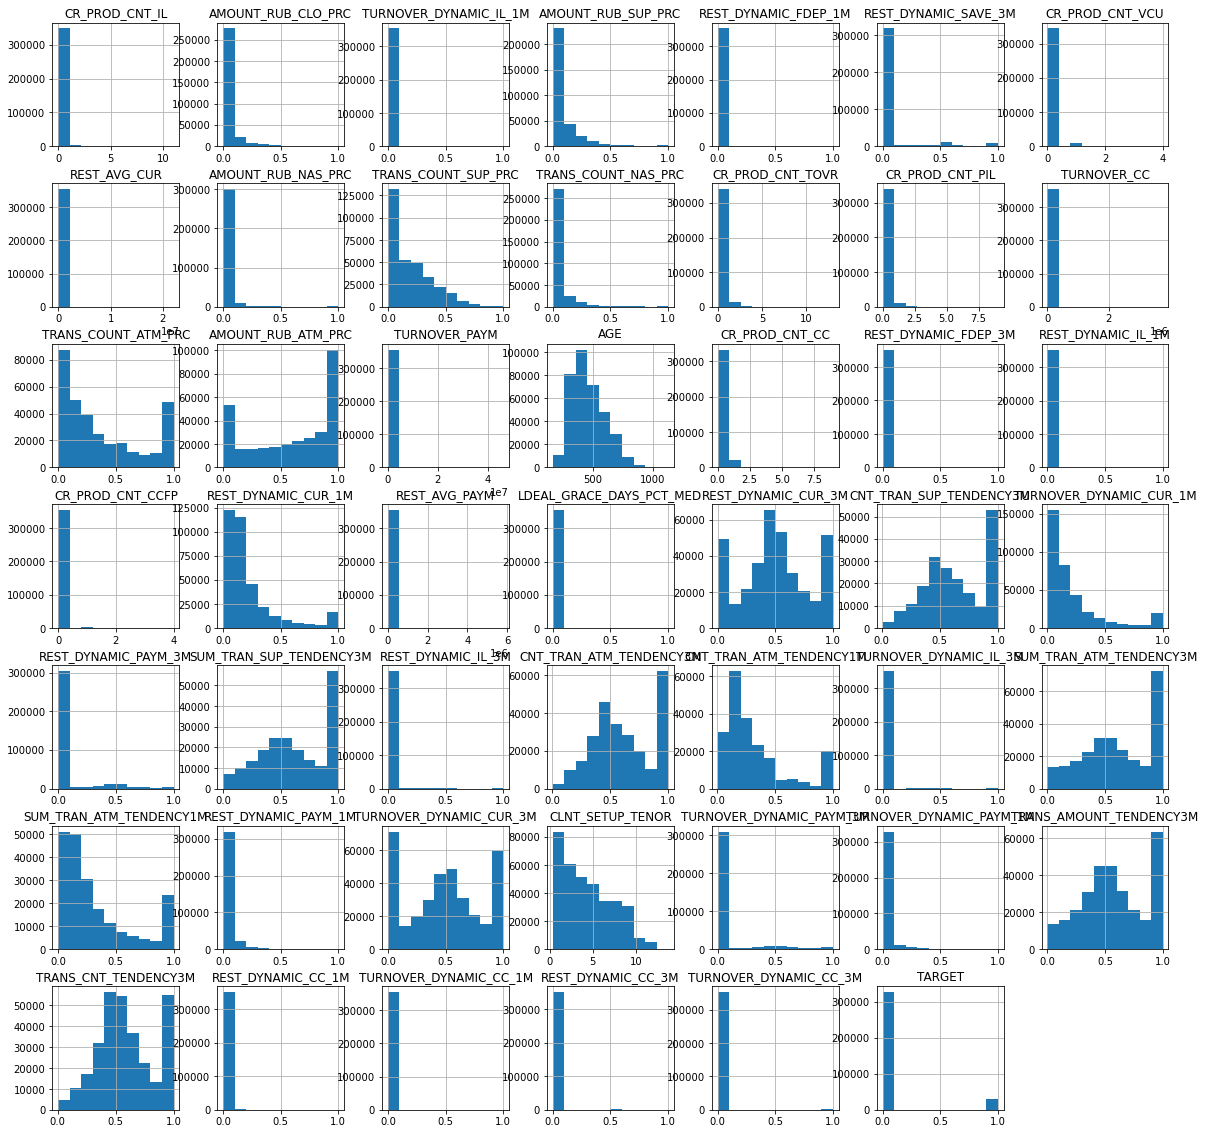

In [13]:
df_.hist(figsize=(20, 20))
None

In [14]:
labels = df_['TARGET']
data = df_.drop(['TARGET'], axis=1)
data

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,...,PACK,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M
0,0,0.000000,0.0,0.000000,0.0,0.541683,0,156067.339767,0.000000,начальник отдела,...,K01,1.593023,0.0,0.0,0.483032,0.406780,0.0,0.0,0.0,0.0
1,0,0.041033,0.0,0.244678,0.0,0.000000,0,4278.845817,0.000000,NaN,...,102,1.587647,0.0,0.0,0.394340,0.545455,0.0,0.0,0.0,0.0
2,0,0.006915,0.0,0.000000,0.0,0.000000,0,112837.062817,0.000000,ГЕНЕРАЛЬНЫЙ ДИРЕКТОР,...,102,1.587647,0.0,0.0,0.399342,0.297297,0.0,0.0,0.0,0.0
3,0,0.000000,0.0,0.000000,0.0,0.005874,0,42902.902883,0.000000,МЕНЕДЖЕР ИАО,...,K01,1.583333,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
4,0,0.000000,0.0,0.000000,0.0,0.000000,0,71906.476533,0.000000,NaN,...,102,1.583333,0.0,0.0,0.611610,0.620690,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355185,0,0.000000,0.0,0.000000,0.0,0.000000,0,9697.620867,0.000000,NaN,...,104,8.963872,0.0,0.0,0.659039,0.785714,0.0,0.0,0.0,0.0
355186,0,0.000000,0.0,0.000000,0.0,0.000000,0,428380.024733,0.262714,NaN,...,104,8.963872,0.0,0.0,0.652612,0.500000,0.0,0.0,0.0,0.0
355187,0,0.041298,0.0,0.095187,0.0,0.000000,0,224884.436700,0.031179,NaN,...,K01,8.966560,0.0,0.0,0.448386,0.459530,0.0,0.0,0.0,0.0
355188,0,0.000000,0.0,0.000000,0.0,0.000000,0,12080.001833,0.282573,Руководитель,...,O01,8.966560,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0


In [15]:
cat_attributes = [col for col in data.columns if data[col].dtype == np.dtype('O')]
num_attributes = [col for col in data.columns if col not in cat_attributes]
print(cat_attributes)
print(num_attributes)

['CLNT_JOB_POSITION', 'PACK']
['CR_PROD_CNT_IL', 'AMOUNT_RUB_CLO_PRC', 'TURNOVER_DYNAMIC_IL_1M', 'AMOUNT_RUB_SUP_PRC', 'REST_DYNAMIC_FDEP_1M', 'REST_DYNAMIC_SAVE_3M', 'CR_PROD_CNT_VCU', 'REST_AVG_CUR', 'AMOUNT_RUB_NAS_PRC', 'TRANS_COUNT_SUP_PRC', 'TRANS_COUNT_NAS_PRC', 'CR_PROD_CNT_TOVR', 'CR_PROD_CNT_PIL', 'TURNOVER_CC', 'TRANS_COUNT_ATM_PRC', 'AMOUNT_RUB_ATM_PRC', 'TURNOVER_PAYM', 'AGE', 'CR_PROD_CNT_CC', 'REST_DYNAMIC_FDEP_3M', 'REST_DYNAMIC_IL_1M', 'CR_PROD_CNT_CCFP', 'REST_DYNAMIC_CUR_1M', 'REST_AVG_PAYM', 'LDEAL_GRACE_DAYS_PCT_MED', 'REST_DYNAMIC_CUR_3M', 'CNT_TRAN_SUP_TENDENCY3M', 'TURNOVER_DYNAMIC_CUR_1M', 'REST_DYNAMIC_PAYM_3M', 'SUM_TRAN_SUP_TENDENCY3M', 'REST_DYNAMIC_IL_3M', 'CNT_TRAN_ATM_TENDENCY3M', 'CNT_TRAN_ATM_TENDENCY1M', 'TURNOVER_DYNAMIC_IL_3M', 'SUM_TRAN_ATM_TENDENCY3M', 'SUM_TRAN_ATM_TENDENCY1M', 'REST_DYNAMIC_PAYM_1M', 'TURNOVER_DYNAMIC_CUR_3M', 'CLNT_SETUP_TENOR', 'TURNOVER_DYNAMIC_PAYM_3M', 'TURNOVER_DYNAMIC_PAYM_1M', 'TRANS_AMOUNT_TENDENCY3M', 'TRANS_CNT_TENDEN

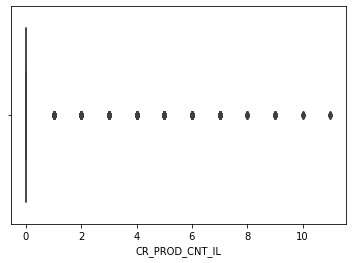

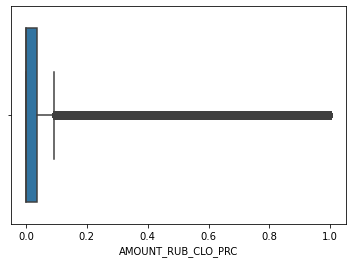

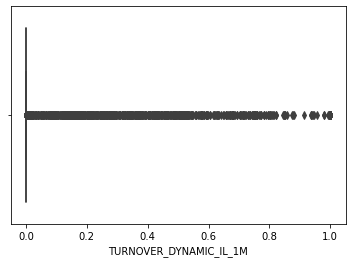

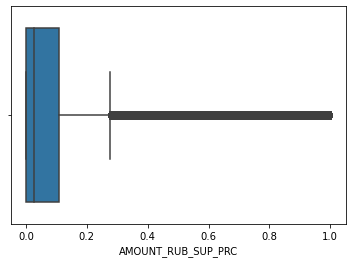

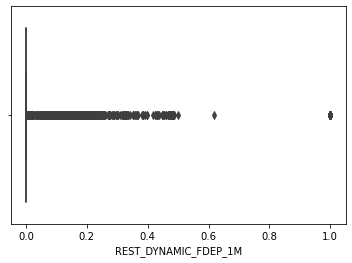

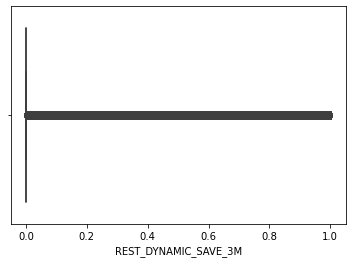

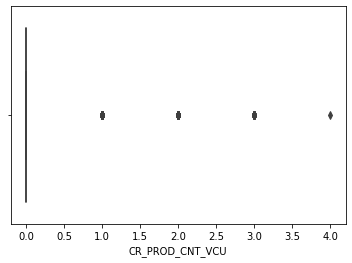

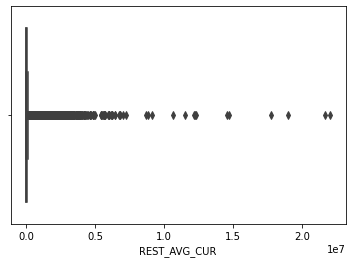

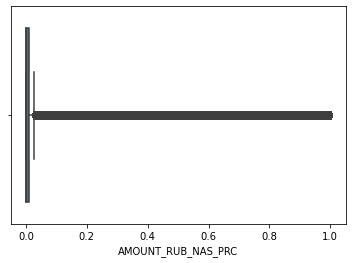

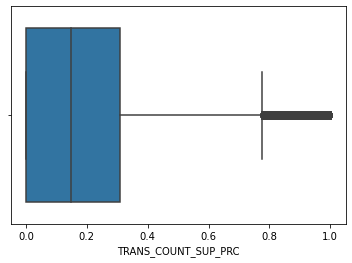

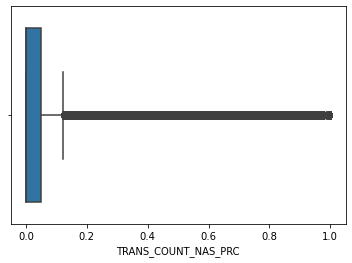

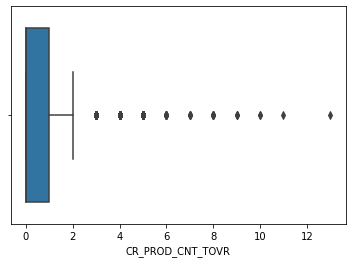

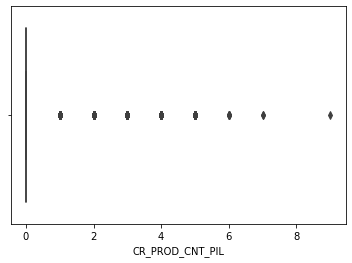

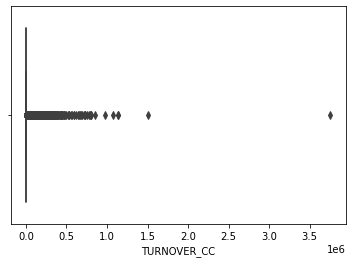

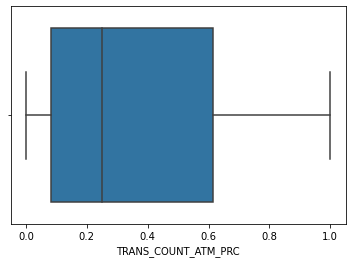

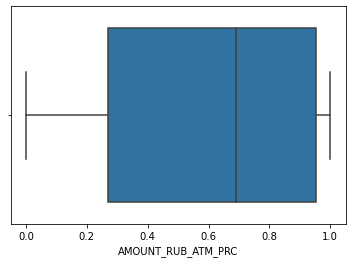

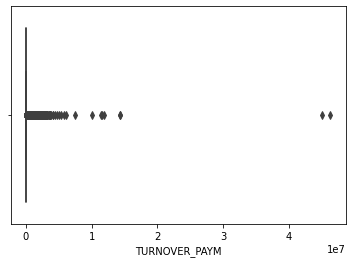

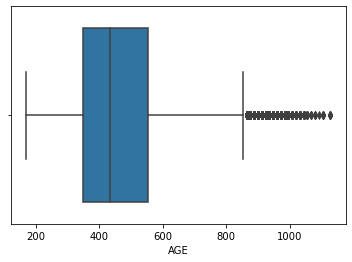

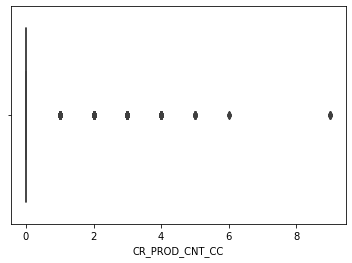

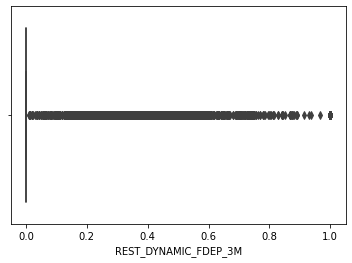

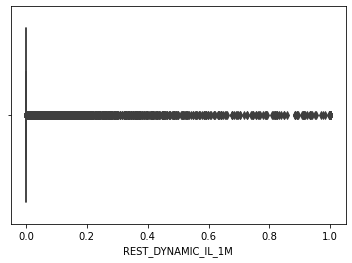

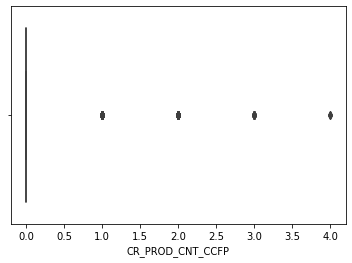

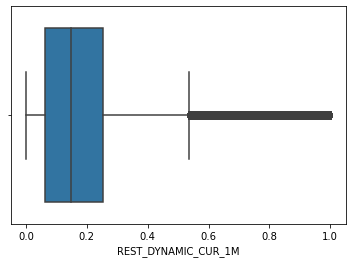

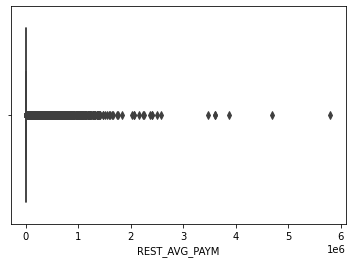

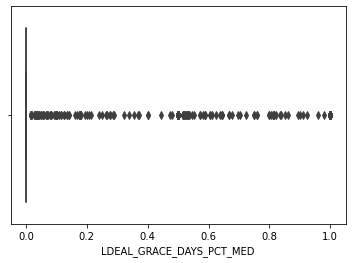

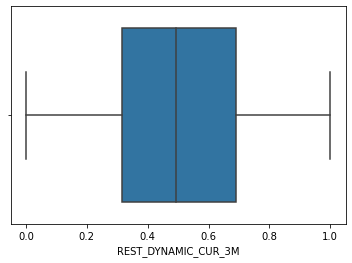

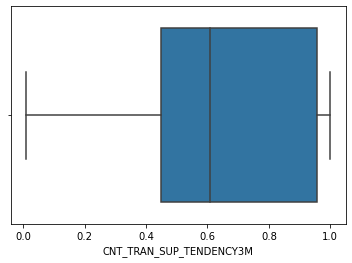

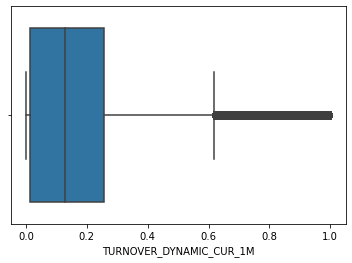

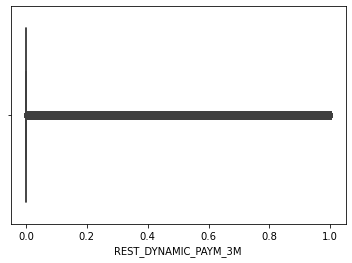

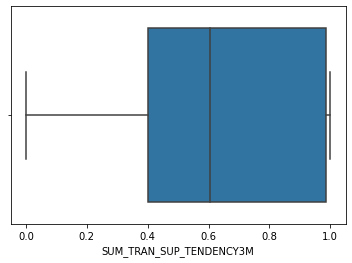

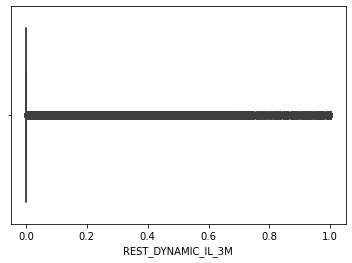

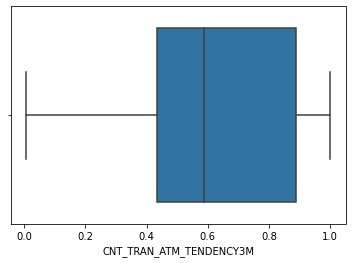

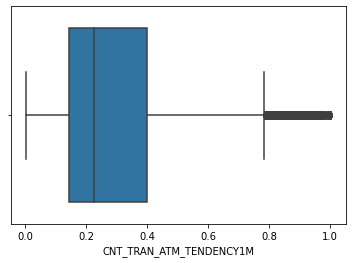

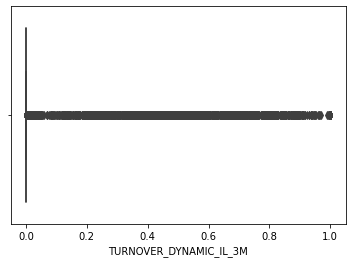

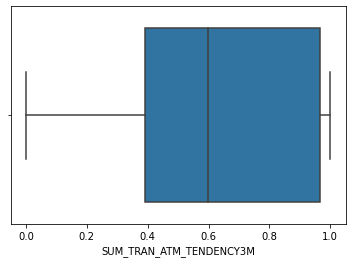

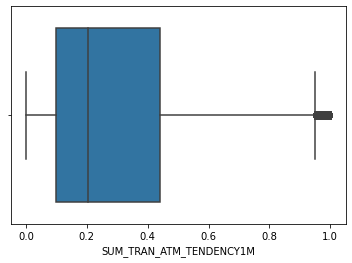

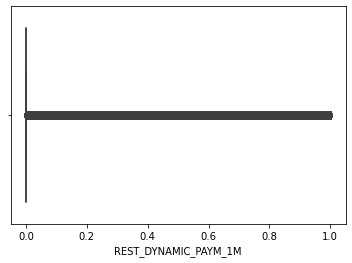

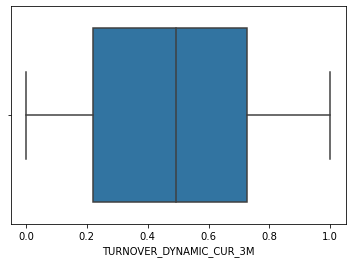

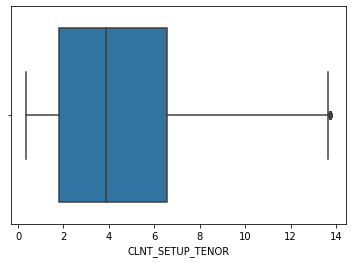

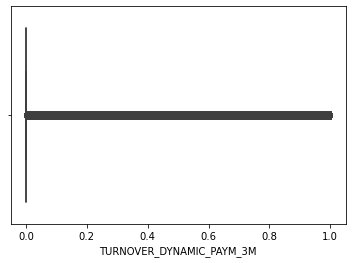

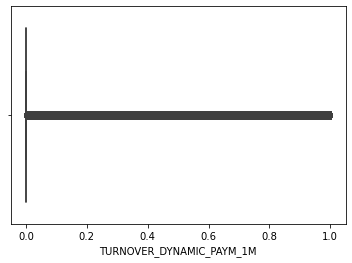

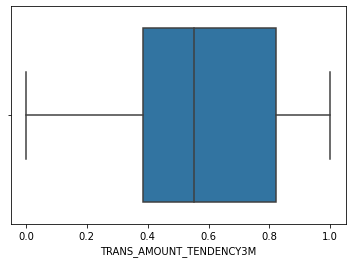

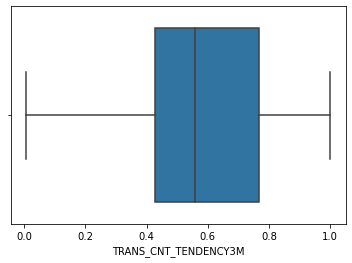

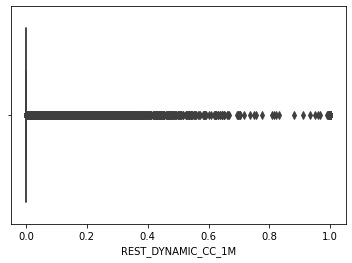

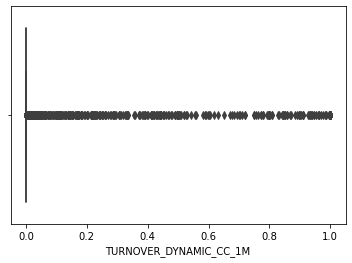

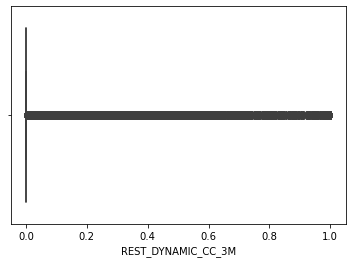

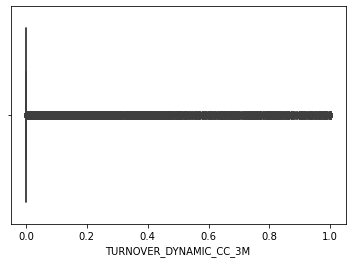

In [16]:
for attr_name in num_attributes:
    sns.boxplot(x=df_[attr_name])
    plt.show()

In [17]:
print(len(set(data['CLNT_JOB_POSITION'])))
print(len(set(data['PACK'])))

19589
12


In [18]:
try:
    data = data.drop(['CLNT_JOB_POSITION'], axis=1)
except KeyError as e:
    pass
cat_attributes.remove('CLNT_JOB_POSITION')

In [19]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attributes)),
    ('imputer', SimpleImputer()),
    ('std_scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attributes)),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [20]:
data_prep = full_pipeline.fit_transform(data)
data_prep

<355071x46 sparse matrix of type '<class 'numpy.float64'>'
	with 12427485 stored elements in Compressed Sparse Row format>

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data_prep, labels, test_size=0.2, random_state=42,
                                                    stratify=labels)

In [23]:
clf = MLPClassifier(random_state=42, max_iter=300)
clf.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=42)

In [24]:
predict = clf.predict(X_test)

In [25]:
roc_auc_score(y_test, predict)

0.522194605326462